In [3]:
# Imports 
import numpy as np
from numpy import sqrt
import matplotlib.pyplot as plt
import sys
import os
import codecs
import re
import requests
import time
from keras.utils import np_utils
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from catboost import CatBoostClassifier, Pool
import shap
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV
from pandas.plotting import scatter_matrix
from matplotlib import cm
import math
import pandas as pd
import graphviz

In [4]:
##DONT DELETE THIS
col_names = ['filename','Total_words',  'High_voice%',  'Loudly%',  'Strongly%',  'Slowly%',  'Rapidly%',  'Quietly%',  'Low_voice%',  'Quatations%',  'Immediate_repetitions',  'Emphasis',  'Flattening',  'Natural',  'Possitive',  'Negative','We%','We_future%','We_past%','We_present%','Self%','Self_future%','Self_past%','Self_present%','You_female%','You_female_future%','You_female_past%','You_female_present%','You_male%','You_male_future%','You_male_past%','You_male_present%','Prepositions%','Prepositions_self%','Prepositions_we%','Prepositions_you_male%','Prepositions_you_female%','Prepositions_you_num_male%','Prepositions_you_num_female%','Prepositions_he%','Prepositions_she%','Prepositions_they_male%','Prepositions_they_female%','Non_clinical_wellbeing%','Clinical_wellbeing%,','Enthusiastic%','Trust%','Ah\Em%','Scale (label)','YN','Stress','Anxeity','inBE','inSA']

data = pd.read_csv('Statistics_curr.csv' ,names=col_names)
data = data.iloc[1:]

YNData = pd.DataFrame(data,columns = ['filename','Total_words',  'High_voice%',  'Loudly%',  'Strongly%',  'Slowly%',  'Rapidly%',  'Quietly%',  'Low_voice%',  'Quatations%',  'Immediate_repetitions',  'Emphasis',  'Flattening',  'Natural',  'Possitive',  'Negative','We%','We_future%','We_past%','We_present%','Self%','Self_future%','Self_past%','Self_present%','You_female%','You_female_future%','You_female_past%','You_female_present%','You_male%','You_male_future%','You_male_past%','You_male_present%','Prepositions%','Prepositions_self%','Prepositions_we%','Prepositions_you_male%','Prepositions_you_female%','Prepositions_you_num_male%','Prepositions_you_num_female%','Prepositions_he%','Prepositions_she%','Prepositions_they_male%','Prepositions_they_female%','Non_clinical_wellbeing%','Clinical_wellbeing%,','Enthusiastic%','Trust%','Ah\Em%','Scale (label)','Stress','Anxeity','inBE','inSA'])
stressData = pd.DataFrame(data,columns = ['filename','Total_words',  'High_voice%',  'Loudly%',  'Strongly%',  'Slowly%',  'Rapidly%',  'Quietly%',  'Low_voice%',  'Quatations%',  'Immediate_repetitions',  'Emphasis',  'Flattening',  'Natural',  'Possitive',  'Negative','We%','We_future%','We_past%','We_present%','Self%','Self_future%','Self_past%','Self_present%','You_female%','You_female_future%','You_female_past%','You_female_present%','You_male%','You_male_future%','You_male_past%','You_male_present%','Prepositions%','Prepositions_self%','Prepositions_we%','Prepositions_you_male%','Prepositions_you_female%','Prepositions_you_num_male%','Prepositions_you_num_female%','Prepositions_he%','Prepositions_she%','Prepositions_they_male%','Prepositions_they_female%','Non_clinical_wellbeing%','Clinical_wellbeing%,','Enthusiastic%','Trust%','Ah\Em%','Scale (label)','YN','Anxeity','inBE','inSA'])
anxeityData = pd.DataFrame(data,columns = ['filename','Total_words',  'High_voice%',  'Loudly%',  'Strongly%',  'Slowly%',  'Rapidly%',  'Quietly%',  'Low_voice%',  'Quatations%',  'Immediate_repetitions',  'Emphasis',  'Flattening',  'Natural',  'Possitive',  'Negative','We%','We_future%','We_past%','We_present%','Self%','Self_future%','Self_past%','Self_present%','You_female%','You_female_future%','You_female_past%','You_female_present%','You_male%','You_male_future%','You_male_past%','You_male_present%','Prepositions%','Prepositions_self%','Prepositions_we%','Prepositions_you_male%','Prepositions_you_female%','Prepositions_you_num_male%','Prepositions_you_num_female%','Prepositions_he%','Prepositions_she%','Prepositions_they_male%','Prepositions_they_female%','Non_clinical_wellbeing%','Clinical_wellbeing%,','Enthusiastic%','Trust%','Ah\Em%','Scale (label)','YN','Stress','inBE','inSA'])
inBEData = pd.DataFrame(data,columns = ['filename','Total_words',  'High_voice%',  'Loudly%',  'Strongly%',  'Slowly%',  'Rapidly%',  'Quietly%',  'Low_voice%',  'Quatations%',  'Immediate_repetitions',  'Emphasis',  'Flattening',  'Natural',  'Possitive',  'Negative','We%','We_future%','We_past%','We_present%','Self%','Self_future%','Self_past%','Self_present%','You_female%','You_female_future%','You_female_past%','You_female_present%','You_male%','You_male_future%','You_male_past%','You_male_present%','Prepositions%','Prepositions_self%','Prepositions_we%','Prepositions_you_male%','Prepositions_you_female%','Prepositions_you_num_male%','Prepositions_you_num_female%','Prepositions_he%','Prepositions_she%','Prepositions_they_male%','Prepositions_they_female%','Non_clinical_wellbeing%','Clinical_wellbeing%,','Enthusiastic%','Trust%','Ah\Em%','Scale (label)','YN','Stress','Anxeity','inSA'])
inSAData = pd.DataFrame(data,columns = ['filename','Total_words',  'High_voice%',  'Loudly%',  'Strongly%',  'Slowly%',  'Rapidly%',  'Quietly%',  'Low_voice%',  'Quatations%',  'Immediate_repetitions',  'Emphasis',  'Flattening',  'Natural',  'Possitive',  'Negative','We%','We_future%','We_past%','We_present%','Self%','Self_future%','Self_past%','Self_present%','You_female%','You_female_future%','You_female_past%','You_female_present%','You_male%','You_male_future%','You_male_past%','You_male_present%','Prepositions%','Prepositions_self%','Prepositions_we%','Prepositions_you_male%','Prepositions_you_female%','Prepositions_you_num_male%','Prepositions_you_num_female%','Prepositions_he%','Prepositions_she%','Prepositions_they_male%','Prepositions_they_female%','Non_clinical_wellbeing%','Clinical_wellbeing%,','Enthusiastic%','Trust%','Ah\Em%','Scale (label)','YN','Stress','Anxeity','inBE'])
##################
data.head()

,filename,Total_words,High_voice%,Loudly%,Strongly%,Slowly%,Rapidly%,Quietly%,Low_voice%,Quatations%,...,"Clinical_wellbeing%,",Enthusiastic%,Trust%,Ah\Em%,Scale (label),YN,Stress,Anxeity,inBE,inSA
1,1039 T2 - final.docx,446.0,0.672645739910314,0.0,1.345291479820628,0.672645739910314,0.0,0.0,0.0,0.0,...,15.694164989939638,5.030181086519114,0.4024144869215292,5.231388329979879,35.79844961,1.0,0.0,0.0,1.0,1.0
2,1041 T2 - final.docx,593.0,1.5177065767284992,1.1804384485666104,1.1804384485666104,0.0,0.0,0.0,0.0,0.16863406408094436,...,8.23045267489712,0.9602194787379973,1.646090534979424,4.663923182441701,13.79844961,0.0,0.0,0.0,1.0,1.0
3,1042 T2 - final.docx,1164.0,0.25773195876288657,0.0859106529209622,1.0309278350515463,0.0,0.0,0.1718213058419244,0.0,0.1718213058419244,...,14.15929203539823,0.34036759700476515,1.8379850238257318,2.518720217835262,30.79844961,0.0,0.0,0.0,1.0,1.0
4,1044 T2 - final.docx,240.0,0.0,0.4166666666666667,0.8333333333333334,0.0,0.0,0.0,0.0,0.0,...,5.483870967741935,1.6129032258064515,0.967741935483871,6.774193548387097,22.79844961,0.0,0.0,0.0,1.0,1.0
5,1045 T2 - final.docx,191.0,0.5235602094240838,0.5235602094240838,0.5235602094240838,0.0,0.0,0.0,0.0,0.0,...,7.111111111111111,0.4444444444444444,0.4444444444444444,2.2222222222222223,40.79844961,1.0,0.0,0.0,1.0,1.0


In [5]:
# Get an approximation for the optimal classification parameters
# Random forest classifier
#CatBoostClassifier(l2_leaf_reg=10, learning_rate=0.05, verbose=False, n_estimators=200, max_depth=10)
class bestCB:

    def __init__(self, n_estimators, learning_rate, max_depth, l2_leaf_reg, testScore):
        self.max_depth = max_depth
        self.learning_rate = learning_rate
        self.n_estimators = n_estimators
        self.l2_leaf_reg = l2_leaf_reg
        self.testScore = testScore

    def setDepth(self, d):
        self.max_depth = d

    def setEstimators(self, e):
        self.n_estimators = e

    def Setl2(self, l):
        self.l2_leaf_reg = l
    
    def SetLearning(self, lr):
        self.learning_rate = lr

    def setScore(self, s):
        self.testScore = s

labels = ['YN','Stress','Anxeity']
for t in range(len(labels)):
    rfParam = bestCB(0, 0, 0, 0, 0)
    # data preperation 
    featureStr = labels[t]
    feature_names = ['Total_words',  'High_voice%',  'Loudly%',  'Strongly%',  'Slowly%',  'Rapidly%',  'Quietly%',  'Low_voice%',  'Quatations%',  'Immediate_repetitions',  'Emphasis',  'Flattening',  'Natural',  'Possitive',  'Negative','We%','We_future%','We_past%','We_present%','Self%','Self_future%','Self_past%','Self_present%','You_female%','You_female_future%','You_female_past%','You_female_present%','You_male%','You_male_future%','You_male_past%','You_male_present%','Prepositions%','Prepositions_self%','Prepositions_we%','Prepositions_you_male%','Prepositions_you_female%','Prepositions_you_num_male%','Prepositions_you_num_female%','Prepositions_he%','Prepositions_she%','Prepositions_they_male%','Prepositions_they_female%','Non_clinical_wellbeing%','Clinical_wellbeing%,','Enthusiastic%','Trust%','Ah\Em%']
    Data = pd.DataFrame(data,columns = ['filename','Total_words',  'High_voice%',  'Loudly%',  'Strongly%',  'Slowly%',  'Rapidly%',  'Quietly%',  'Low_voice%',  'Quatations%',  'Immediate_repetitions',  'Emphasis',  'Flattening',  'Natural',  'Possitive',  'Negative','We%','We_future%','We_past%','We_present%','Self%','Self_future%','Self_past%','Self_present%','You_female%','You_female_future%','You_female_past%','You_female_present%','You_male%','You_male_future%','You_male_past%','You_male_present%','Prepositions%','Prepositions_self%','Prepositions_we%','Prepositions_you_male%','Prepositions_you_female%','Prepositions_you_num_male%','Prepositions_you_num_female%','Prepositions_he%','Prepositions_she%','Prepositions_they_male%','Prepositions_they_female%','Non_clinical_wellbeing%','Clinical_wellbeing%,','Enthusiastic%','Trust%','Ah\Em%'])
    X = Data[feature_names]
    yn = data[featureStr]
    X_train, X_test, y_train, y_test = train_test_split(X, yn, random_state=0)
    # optimizing
    loop = 10
    TreedepthList = [2, 3, 5, 7, 9, 10, 11, 12, 13, 15] 
    depthList = [2, 5, 7, 10, 15, 20, 25, 30, 35, 40]    
    for i in range(loop):
        for j in range(loop):
            for k in range(loop):
                lr = 0.1
                for x in range(loop):
                    model = CatBoostClassifier(max_depth=TreedepthList[i], l2_leaf_reg=depthList[j], n_estimators=depthList[k], learning_rate=lr, verbose=False)
                    model.fit(X_train, y_train)
                    score = model.score(X_test, y_test)
                    if score > float(rfParam.testScore):
                        rfParam.setDepth(TreedepthList[i])
                        rfParam.Setl2(depthList[j])
                        rfParam.setEstimators(depthList[k])
                        rfParam.setScore(score)
                        rfParam.SetLearning(lr)
                    lr += 0.1   # appendix lr for next iteration
                                  

    print('Label ' + labels[t] + " Best catboost parameters:")
    print("max_depth = ", rfParam.max_depth)
    print('l2_leaf_reg = ', rfParam.l2_leaf_reg)
    print('n_estimators = ', rfParam.n_estimators)
    print('learning_rate = ', rfParam.learning_rate)
    print('Score = ', rfParam.testScore)
    print('')


KeyboardInterrupt: 

In [ ]:
# trying with grid search - gb
labels = ['YN','Stress','Anxeity']
for t in range(len(labels)):
    # data preperation 
    featureStr = labels[t]
    feature_names = ['Total_words',  'High_voice%',  'Loudly%',  'Strongly%',  'Slowly%',  'Rapidly%',  'Quietly%',  'Low_voice%',  'Quatations%',  'Immediate_repetitions',  'Emphasis',  'Flattening',  'Natural',  'Possitive',  'Negative','We%','We_future%','We_past%','We_present%','Self%','Self_future%','Self_past%','Self_present%','You_female%','You_female_future%','You_female_past%','You_female_present%','You_male%','You_male_future%','You_male_past%','You_male_present%','Prepositions%','Prepositions_self%','Prepositions_we%','Prepositions_you_male%','Prepositions_you_female%','Prepositions_you_num_male%','Prepositions_you_num_female%','Prepositions_he%','Prepositions_she%','Prepositions_they_male%','Prepositions_they_female%','Non_clinical_wellbeing%','Clinical_wellbeing%,','Enthusiastic%','Trust%','Ah\Em%']
    Data = pd.DataFrame(data,columns = ['filename','Total_words',  'High_voice%',  'Loudly%',  'Strongly%',  'Slowly%',  'Rapidly%',  'Quietly%',  'Low_voice%',  'Quatations%',  'Immediate_repetitions',  'Emphasis',  'Flattening',  'Natural',  'Possitive',  'Negative','We%','We_future%','We_past%','We_present%','Self%','Self_future%','Self_past%','Self_present%','You_female%','You_female_future%','You_female_past%','You_female_present%','You_male%','You_male_future%','You_male_past%','You_male_present%','Prepositions%','Prepositions_self%','Prepositions_we%','Prepositions_you_male%','Prepositions_you_female%','Prepositions_you_num_male%','Prepositions_you_num_female%','Prepositions_he%','Prepositions_she%','Prepositions_they_male%','Prepositions_they_female%','Non_clinical_wellbeing%','Clinical_wellbeing%,','Enthusiastic%','Trust%','Ah\Em%'])
    X = Data[feature_names]
    yn = data[featureStr]
    X_train, X_test, y_train, y_test = train_test_split(X, yn, random_state=0)    
    param_grid = {'max_depth': [3, 5, 10, 15, 20, 25, 30, 35, 40, 45],
                   'min_samples_split': [2, 5, 10, 15, 20, 25, 30, 35, 40, 45],
                 'max_leaf_nodes':[2, 5, 10, 15, 20, 25, 30, 35, 40, 45],
                 'learning_rate':[0.1, 0.2 ,0.4 ,0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0]}
    base_estimator = GradientBoostingClassifier(random_state=0)
    sh = HalvingGridSearchCV(base_estimator, param_grid, cv=5,
                              factor=2, resource='n_estimators',
                              max_resources=30).fit(X_train, y_train)
    print(labels[t])
    print(sh.best_estimator_)
    print('')
#RandomForestClassifier(max_depth=5, n_estimators=24, random_state=0)

In [ ]:
# trying with grid search - catboost
#CatBoostClassifier(l2_leaf_reg=10, learning_rate=0.05, verbose=False, n_estimators=200, max_depth=10)
labels = ['YN','Stress','Anxeity']
for t in range(len(labels)):
    # data preperation
    featureStr = labels[t]
    feature_names = ['Total_words',  'High_voice%',  'Loudly%',  'Strongly%',  'Slowly%',  'Rapidly%',  'Quietly%',  'Low_voice%',  'Quatations%',  'Immediate_repetitions',  'Emphasis',  'Flattening',  'Natural',  'Possitive',  'Negative','We%','We_future%','We_past%','We_present%','Self%','Self_future%','Self_past%','Self_present%','You_female%','You_female_future%','You_female_past%','You_female_present%','You_male%','You_male_future%','You_male_past%','You_male_present%','Prepositions%','Prepositions_self%','Prepositions_we%','Prepositions_you_male%','Prepositions_you_female%','Prepositions_you_num_male%','Prepositions_you_num_female%','Prepositions_he%','Prepositions_she%','Prepositions_they_male%','Prepositions_they_female%','Non_clinical_wellbeing%','Clinical_wellbeing%,','Enthusiastic%','Trust%','Ah\Em%']
    Data = pd.DataFrame(data,columns = ['filename','Total_words',  'High_voice%',  'Loudly%',  'Strongly%',  'Slowly%',  'Rapidly%',  'Quietly%',  'Low_voice%',  'Quatations%',  'Immediate_repetitions',  'Emphasis',  'Flattening',  'Natural',  'Possitive',  'Negative','We%','We_future%','We_past%','We_present%','Self%','Self_future%','Self_past%','Self_present%','You_female%','You_female_future%','You_female_past%','You_female_present%','You_male%','You_male_future%','You_male_past%','You_male_present%','Prepositions%','Prepositions_self%','Prepositions_we%','Prepositions_you_male%','Prepositions_you_female%','Prepositions_you_num_male%','Prepositions_you_num_female%','Prepositions_he%','Prepositions_she%','Prepositions_they_male%','Prepositions_they_female%','Non_clinical_wellbeing%','Clinical_wellbeing%,','Enthusiastic%','Trust%','Ah\Em%'])
    X = Data[feature_names]
    yn = data[featureStr]
    X_train, X_test, y_train, y_test = train_test_split(X, yn, random_state=0)    
    param_grid = {'max_depth': [3, 5, 8, 10, 12, 15], 
                  'n_estimators': [2, 10, 50, 100, 150, 200, 250],
                  'l2_leaf_reg':[2, 5, 15, 20, 25, 30, 35, 45],
                  'learning_rate':[0.05 ,0.1, 0.15, 0.2]}
    base_estimator = CatBoostClassifier()
    grid_search_result = base_estimator.grid_search(param_grid, 
                                       X=X_train, 
                                       y=y_train,  
                                       plot=False)
    print(grid_search_result)

YN classifiers: 

             feature_names  feature_importance
0              Total_words            0.020848
1              High_voice%            0.122668
2                  Loudly%            0.022549
3                Strongly%            0.081105
5                 Rapidly%            0.036909
9    Immediate_repetitions            0.036369
10                Emphasis            0.038122
13               Possitive            0.037828
14                Negative            0.039805
22           Self_present%            0.019883
24      You_female_future%            0.025026
25        You_female_past%            0.070785
27               You_male%            0.016505
28        You_male_future%            0.062500
31           Prepositions%            0.043265
32      Prepositions_self%            0.007226
34  Prepositions_you_male%            0.016594
38        Prepositions_he%            0.022549
43    Clinical_wellbeing%,            0.037081
44           Enthusiastic%            0.07


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0:	learn: 0.6287701	total: 161ms	remaining: 1.45s
1:	learn: 0.5653229	total: 600ms	remaining: 2.4s
2:	learn: 0.5157044	total: 758ms	remaining: 1.77s
3:	learn: 0.4769626	total: 847ms	remaining: 1.27s
4:	learn: 0.4413278	total: 1.18s	remaining: 1.18s
5:	learn: 0.4081631	total: 1.51s	remaining: 1s
6:	learn: 0.3806784	total: 1.95s	remaining: 836ms
7:	learn: 0.3555406	total: 2.27s	remaining: 567ms
8:	learn: 0.3330928	total: 2.43s	remaining: 270ms
9:	learn: 0.3136016	total: 2.77s	remaining: 0us
0:	learn: 0.6287701	total: 185ms	remaining: 1.66s
1:	learn: 0.5653229	total: 509ms	remaining: 2.04s
2:	learn: 0.5157044	total: 675ms	remaining: 1.57s
3:	learn: 0.4769626	total: 766ms	remaining: 1.15s
4:	learn: 0.4413278	total: 1.1s	remaining: 1.1s
5:	learn: 0.4081631	total: 1.43s	remaining: 956ms
6:	learn: 0.3806784	total: 1.77s	remaining: 761ms
7:	learn: 0.3555406	total: 2.11s	remaining: 527ms
8:	learn: 0.3330928	total: 2.27s	remaining: 252ms
9:	learn: 0.3136016	total: 2.61s	remaining: 0us
CatBoost c


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0:	learn: 0.3415361	total: 21ms	remaining: 83.9ms
1:	learn: 0.2015070	total: 39.5ms	remaining: 59.3ms
2:	learn: 0.1342421	total: 56.6ms	remaining: 37.7ms
3:	learn: 0.1039608	total: 73.3ms	remaining: 18.3ms
4:	learn: 0.0740032	total: 90ms	remaining: 0us
CatBoost classifier results of the Stress column:
Accuracy of CatBoost classifier on training set: 1.00
Accuracy of CatBoost classifier on test set: 0.97
f1-score of CatBoost classifier on the actual data 0.97
Success rate of the actual data 0.99
Percentage of possitive labels (of the original data) 10.64%
Percentage of negative labels (of the original data) 89.36%
Stratified cross-validation
train -  [84 10]   |   test -  [42  5]
train -  [84 10]   |   test -  [42  5]
train -  [84 10]   |   test -  [42  5]

---------------------------------------------------------------------------
Anxeity classifiers: 

              feature_names  feature_importance
1               High_voice%            0.153632
2                   Loudly%           


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


1:	learn: 0.6423874	total: 122ms	remaining: 487ms
2:	learn: 0.6291546	total: 277ms	remaining: 645ms
3:	learn: 0.6159098	total: 408ms	remaining: 612ms
4:	learn: 0.6029888	total: 541ms	remaining: 541ms
5:	learn: 0.5909225	total: 635ms	remaining: 424ms
6:	learn: 0.5769549	total: 725ms	remaining: 311ms
7:	learn: 0.5648619	total: 806ms	remaining: 201ms
8:	learn: 0.5523210	total: 892ms	remaining: 99.1ms
9:	learn: 0.5410662	total: 980ms	remaining: 0us
0:	learn: 0.6617780	total: 6.41ms	remaining: 57.7ms
1:	learn: 0.6423874	total: 101ms	remaining: 403ms
2:	learn: 0.6291546	total: 182ms	remaining: 424ms
3:	learn: 0.6159098	total: 264ms	remaining: 396ms
4:	learn: 0.6029888	total: 363ms	remaining: 363ms
5:	learn: 0.5909225	total: 436ms	remaining: 291ms
6:	learn: 0.5769549	total: 512ms	remaining: 219ms
7:	learn: 0.5648619	total: 598ms	remaining: 149ms
8:	learn: 0.5523210	total: 681ms	remaining: 75.6ms
9:	learn: 0.5410662	total: 767ms	remaining: 0us
CatBoost classifier results of the Anxeity column:

The least populated class in y has only 1 members, which is less than n_splits=3.


Gradient Boosting classifier results of the inBE column:
Accuracy of Gradient Boosting classifier on training set: 1.00
Accuracy of Gradient Boosting classifier on test set: 0.97
f1-score of Gradient Boosting classifier on the actual data 1.00
Success rate of the actual data 0.99
Percentage of possitive labels (of the original data) 99.29%
Percentage of negative labels (of the original data) 0.71%
Stratified cross-validation
train -  [ 1 93]   |   test -  [ 0 47]
train -  [ 1 93]   |   test -  [ 0 47]
train -  [ 0 94]   |   test -  [ 1 46]

0:	learn: 0.2154999	total: 23.9ms	remaining: 95.6ms
1:	learn: 0.1275745	total: 41.3ms	remaining: 61.9ms
2:	learn: 0.0751922	total: 58.6ms	remaining: 39.1ms
3:	learn: 0.0337023	total: 76.4ms	remaining: 19.1ms
4:	learn: 0.0241284	total: 95.3ms	remaining: 0us


The least populated class in y has only 1 members, which is less than n_splits=3.

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0:	learn: 0.2154999	total: 36.6ms	remaining: 147ms
1:	learn: 0.1275745	total: 56.8ms	remaining: 85.3ms
2:	learn: 0.0751922	total: 75.9ms	remaining: 50.6ms
3:	learn: 0.0337023	total: 96.2ms	remaining: 24ms
4:	learn: 0.0241284	total: 114ms	remaining: 0us
CatBoost classifier results of the inBE column:
Accuracy of CatBoost classifier on training set: 1.00
Accuracy of CatBoost classifier on test set: 1.00
f1-score of CatBoost classifier on the actual data 1.00
Success rate of the actual data 1.00
Percentage of possitive labels (of the original data) 99.29%
Percentage of negative labels (of the original data) 0.71%
Stratified cross-validation
train -  [ 1 93]   |   test -  [ 0 47]
train -  [ 1 93]   |   test -  [ 0 47]
train -  [ 0 94]   |   test -  [ 1 46]

---------------------------------------------------------------------------
inSA classifiers: 



The least populated class in y has only 1 members, which is less than n_splits=3.


Random Forest classifier results of the inSA column:
Accuracy of Random Forest classifier on training set: 1.00
Accuracy of Random Forest classifier on test set: 1.00
f1-score of Random Forest classifier on the actual data 1.00
Success rate of the actual data 1.00
Percentage of possitive labels (of the original data) 99.29%
Percentage of negative labels (of the original data) 0.71%
Stratified cross-validation
train -  [ 1 93]   |   test -  [ 0 47]
train -  [ 1 93]   |   test -  [ 0 47]
train -  [ 0 94]   |   test -  [ 1 46]

Gradient Boosting classifier results of the inSA column:
Accuracy of Gradient Boosting classifier on training set: 1.00


The least populated class in y has only 1 members, which is less than n_splits=3.
The least populated class in y has only 1 members, which is less than n_splits=3.

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy of Gradient Boosting classifier on test set: 0.92
f1-score of Gradient Boosting classifier on the actual data 0.99
Success rate of the actual data 0.98
Percentage of possitive labels (of the original data) 99.29%
Percentage of negative labels (of the original data) 0.71%
Stratified cross-validation
train -  [ 1 93]   |   test -  [ 0 47]
train -  [ 1 93]   |   test -  [ 0 47]
train -  [ 0 94]   |   test -  [ 1 46]

0:	learn: 0.2154999	total: 20.9ms	remaining: 83.5ms
1:	learn: 0.1241243	total: 38.9ms	remaining: 58.3ms
2:	learn: 0.0709703	total: 56.7ms	remaining: 37.8ms
3:	learn: 0.0408159	total: 66.7ms	remaining: 16.7ms
4:	learn: 0.0309843	total: 83.5ms	remaining: 0us
0:	learn: 0.2154999	total: 20.4ms	remaining: 81.7ms
1:	learn: 0.1241243	total: 38.6ms	remaining: 58ms
2:	learn: 0.0709703	total: 55.9ms	remaining: 37.3ms
3:	learn: 0.0408159	total: 65.8ms	remaining: 16.5ms
4:	learn: 0.0309843	total: 83.9ms	remaining: 0us
CatBoost classifier results of the inSA column:
Accuracy of C

The least populated class in y has only 1 members, which is less than n_splits=3.


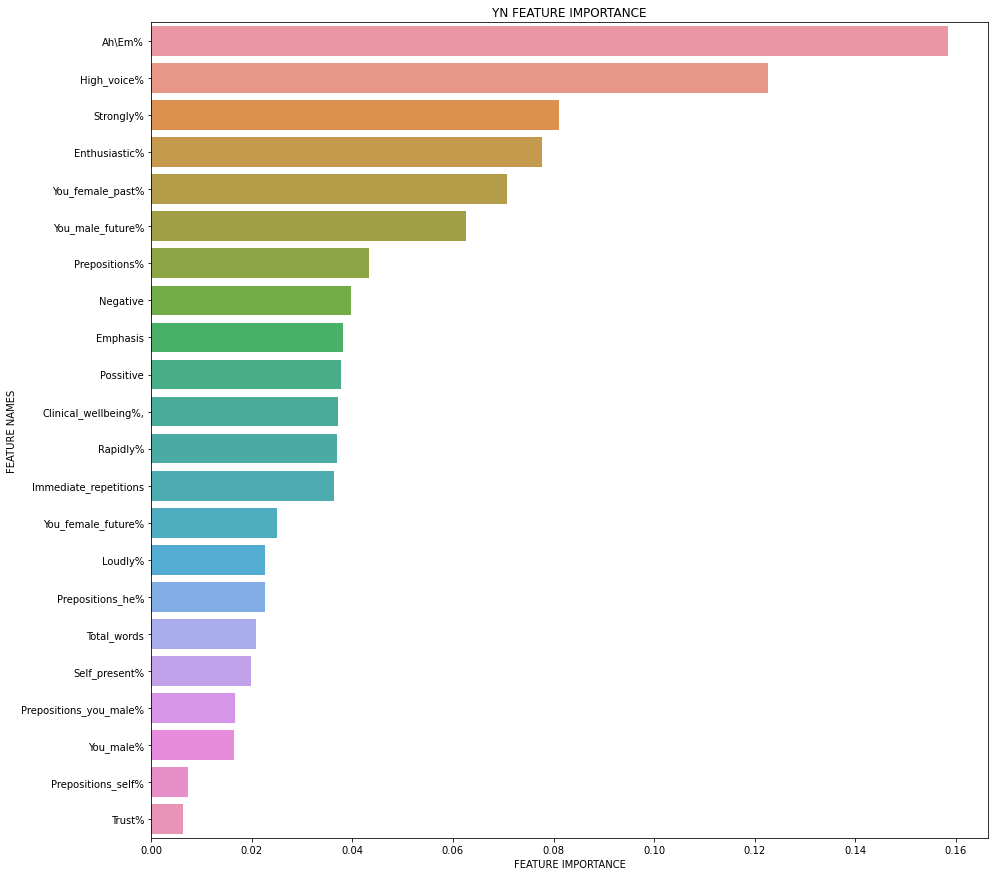

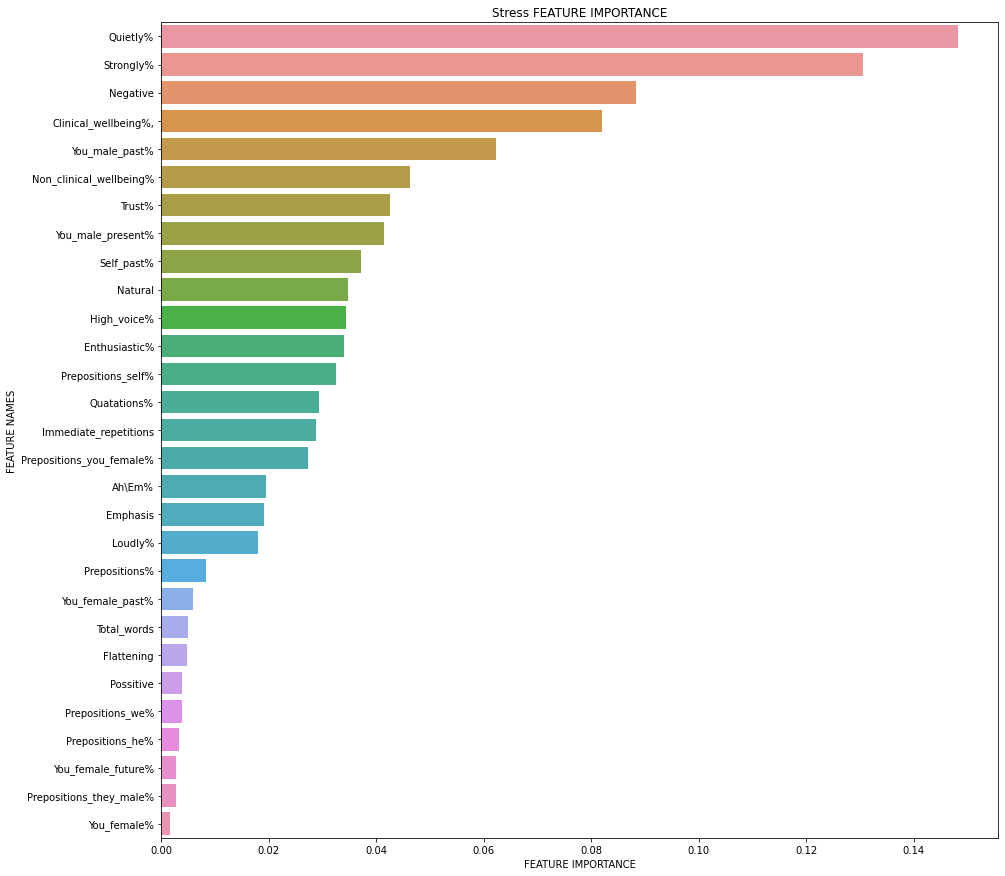

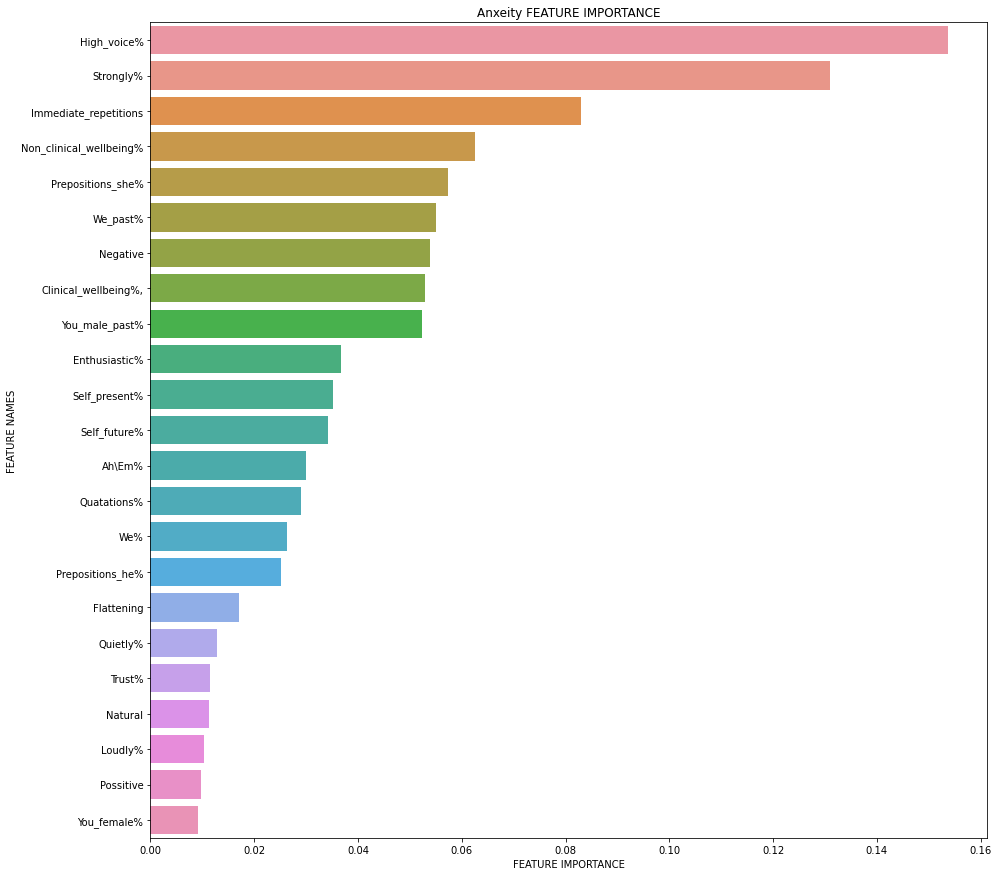

In [33]:
numOfModels = 3
#feature_names without filename 
def plot_feature_importance(importance,names,model_type):
    
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    #print(fi_df)
    lstInd = []
    for i in range(0, len(fi_df)):
        if(fi_df.iloc[i]['feature_importance'] == 0):
            lstInd.append(fi_df.index[i])
        #if(fi_df.iloc[i]['feature_importance'] == 0):
        #    fi_df.drop(fi_df.index[i], inplace=True)
            
    fi_df.drop(fi_df.index[lstInd], inplace=True)        
    print(fi_df) 
    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
           
    #Define size of bar plot
    plt.figure(figsize=(15,15))
    #Plot Searborn bar chart
    sns_plot = sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    fig = sns_plot.get_figure()
    fig.savefig(model_type + ".png")
def zeroAndOnes(y):
    zeros = 0
    ones = 0
    leny = len(y)
    if leny == 0:
        print('length of y is zero')
        return
    for i in range(leny):   
        if y[i] == '1':
            ones += 1
        if y[i] == '0':
            zeros += 1
    return (100*ones/leny,100*zeros/leny)    

def successRate(X,y):
    suc = 0
    leny = len(y)
    for i in range(leny):
        if X[i] ==  y[i]:
            suc += 1
    return suc/leny

def str2digits(arr, npArr = True):
    strArr = []
    for ele in arr:
        if ele == '1' or ele == '1.0':
            strArr.append(1)
        else:
            strArr.append(0)
    if npArr:
        final = np.asarray(strArr)
    else:
        final = strArr
    return final

def digit2str(arr):
    strArr = []
    for ele in arr:
        if ele == '1' or ele == '1.0':
            strArr.append('1')
        else:
            strArr.append('0')
    return strArr

def models(X_train,y_train, X_test, y_test, X, yn, numModel, modelName, featureStr):      
    model1 = None
    model2 = None
    model3 = None
    model4 = None
    retrain = True
    if numModel == 0:
        feature_names = ['Total_words', 'High_voice%',  'Loudly%',  'Strongly%',  'Slowly%',  'Rapidly%',  'Quietly%',  'Low_voice%',  'Quatations%',  'Immediate_repetitions',  'Emphasis',  'Flattening',  'Natural',  'Possitive',  'Negative','We%','We_future%','We_past%','We_present%','Self%','Self_future%','Self_past%','Self_present%','You_female%','You_female_future%','You_female_past%','You_female_present%','You_male%','You_male_future%','You_male_past%','You_male_present%','Prepositions%','Prepositions_self%','Prepositions_we%','Prepositions_you_male%','Prepositions_you_female%','Prepositions_you_num_male%','Prepositions_you_num_female%','Prepositions_he%','Prepositions_she%','Prepositions_they_male%','Prepositions_they_female%','Non_clinical_wellbeing%','Clinical_wellbeing%,','Enthusiastic%','Trust%','Ah\Em%']
        #Label YN Best random forest parameters:
        sgFlag = False
        if(featureStr == 'YN'):
            model3 = RandomForestClassifier(max_depth=5, max_leaf_nodes=25, min_samples_split=40,n_estimators=16, random_state=0)
            max_depth1 =  10
            max_leaf_nodes1 =  21
            n_estimators1 =  4
            sgFlag = True
            model3.fit(X_train, y_train)
            importance = model3.feature_importances_
            # summarize feature importance
            #for i,v in enumerate(importance):
            #    print('Feature:' + feature_names[i] + ' , Score: ' + str(v))
            # plot feature importance
            #plt.bar([x for x in range(len(importance))], importance)
            #plt.show()
            plot_feature_importance(importance,feature_names,featureStr)
            #Score =  0.8333333333333334
        #Label Stress Best random forest parameters:
        if(featureStr == 'Stress'):
            model3 = RandomForestClassifier(max_depth=5, max_leaf_nodes=20, min_samples_split=35,n_estimators=16, random_state=0)
            max_depth1 =  8
            max_leaf_nodes1 =  11
            n_estimators1 =  4
            sgFlag = True
            model3.fit(X_train, y_train)
            importance = model3.feature_importances_
            # summarize feature importance
            #for i,v in enumerate(importance):
            #    print('Feature:' + feature_names[i] + ' , Score: ' + str(v))
            # plot feature importance
            #plt.bar([x for x in range(len(importance))], importance)
            #plt.show()
            plot_feature_importance(importance,feature_names,featureStr)
            #Score =  1.0
        #Label Anxeity Best random forest parameters:
        if(featureStr == 'Anxeity'):
            model3 = RandomForestClassifier(max_depth=3, max_leaf_nodes=25, min_samples_split=45,n_estimators=16, random_state=0)
            max_depth1 =  20
            max_leaf_nodes1 =  5
            n_estimators1 =  7
            sgFlag = True
            model3.fit(X_train, y_train)
            importance = model3.feature_importances_
            # summarize feature importance
            #for i,v in enumerate(importance):
            #    print('Feature:' + feature_names[i] + ' , Score: ' + str(v))
            # plot feature importance
            #plt.bar([x for x in range(len(importance))], importance)
            #plt.show()
            plot_feature_importance(importance,feature_names,featureStr)
            #Score =  0.9444444444444444
        if(sgFlag is True):
            model = RandomForestClassifier(max_depth=max_depth1, max_leaf_nodes=max_leaf_nodes1, n_estimators=n_estimators1) 
            model1 = RandomForestClassifier()
            model2 = RandomForestClassifier(max_depth=3, max_leaf_nodes=25, min_samples_split=45,n_estimators=16, random_state=0)
        else:
            model = RandomForestClassifier()
    if numModel == 1:
        #Label YN Best gb:
        sgFlag = False
        if(featureStr == 'YN'):
            model3 = GradientBoostingClassifier(max_depth=40, max_leaf_nodes=5, n_estimators=16,random_state=0)
            sgFlag = True
            max_depth1 = 5
            max_leaf_nodes1 = 7
            n_estimators1 = 16
            learning_rate1 = 2.0
            #Score= 0.8333333333333334
        #Label Stress Best gb:
        if(featureStr == 'Stress'):
            model3 = GradientBoostingClassifier(max_depth=15, max_leaf_nodes=5, min_samples_split=15,n_estimators=16, random_state=0)
            sgFlag = True
            max_depth1= 7
            max_leaf_nodes1= 4
            n_estimators1= 15
            learning_rate1= 0.8999999999999999
            #Score= 0.9722
        #Label Anxeity Best gb:
        if(featureStr == 'Anxeity'):
            model3 = GradientBoostingClassifier(max_leaf_nodes=30, n_estimators=16, random_state=0)
            sgFlag1 = True
            max_depth1= 2
            max_leaf_nodes1= 2
            n_estimators1= 2
            learning_rate1= 0.1
            #Score= 0.8888888888888888
        if(sgFlag is True):
            model = GradientBoostingClassifier(max_depth=max_depth1, max_leaf_nodes=max_leaf_nodes1,n_estimators=n_estimators1, learning_rate=learning_rate1) 
            model1 = GradientBoostingClassifier() 
            model2 = GradientBoostingClassifier(max_leaf_nodes=30, n_estimators=16, random_state=0)
        else:
            model = GradientBoostingClassifier()
    if numModel == 2:
        sgFlag = True
        if featureStr != 'YN' and featureStr != 'Stress' and featureStr != 'Anxeity':
            model4 = CatBoostClassifier(max_depth =  9, l2_leaf_reg =  2, n_estimators =  5,
                                        learning_rate =  0.5)
        if(featureStr == 'YN'):
            model4 = CatBoostClassifier(max_depth =  13, l2_leaf_reg =  35, n_estimators =  10, learning_rate =  0.8999999999999999)
        if(featureStr == 'Stress'):
            model4 = CatBoostClassifier(max_depth =  9, l2_leaf_reg =  2, n_estimators =  5,learning_rate =  0.5)
        if(featureStr == 'Anxeity'):
            model4 = CatBoostClassifier(max_depth =  11, l2_leaf_reg =  35, n_estimators =  10,learning_rate =  0.2)            

        if(sgFlag is True):
            retrain = False
            names = ['High_voice%',  'Loudly%',  'Strongly%',  'Slowly%',  'Rapidly%','Quietly%',  'Low_voice%',  'Quatations%',  'Immediate_repetitions',  'Emphasis',  'Flattening',  'Natural',  'Possitive',  'Negative','We%','We_future%','We_past%','We_present%','Self%','Self_future%','Self_past%','Self_present%','You_female%','You_female_future%','You_female_past%','You_female_present%','You_male%','You_male_future%','You_male_past%','You_male_present%','Prepositions%','Prepositions_self%','Prepositions_we%','Prepositions_you_male%','Prepositions_you_female%','Prepositions_you_num_male%','Prepositions_you_num_female%','Prepositions_he%','Prepositions_she%','Prepositions_they_male%','Prepositions_they_female%','Non_clinical_wellbeing%','Clinical_wellbeing%,','Enthusiastic%','Trust%','Ah\Em%']
            #y_train.info()
            #X_train.info()
            #for col in names:
            #    y_train[col]=y_train[col].astype('int64')
            #print(X_train['High_voice%']) 
            X_test['High_voice%'] = pd.to_numeric(X_test['High_voice%'])  
            #print(y_test[0])
            #for ele in X_test['High_voice%']:
            #    print(type(ele))    
            model= model4
            model.fit(X_train, y_train)
            
            #X_shap = X_test.iloc[1: , :]
            
            #shap_values = model.get_feature_importance(Pool(data=X_test, label=y_test, cat_features=names), 
            #                                                        type="ShapValues")
            #expected_value = shap_values[0,-1]
            #shap_values = shap_values[:,:-1]

            #shap.initjs()
            #shap.force_plot(expected_value, shap_values[3,:], X_test.iloc[3,:])
            #importance = model.get_feature_importance(Pool(X_train, y_train, cat_features=names))
            #num_classes = 47
            #plot_feature_importance(importance,names,'CatBoost')
            #y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
            #y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

    if retrain is True:    
        model.fit(X_train, y_train)
    
    if model1 is not None:
        model1.fit(X_train, y_train)
        if model.score(X_test, y_test) < model1.score(X_test, y_test):
            #print('\n\n\nhey\n\n\n')
            model = model1
    
    if model2 is not None: 
        model2.fit(X_train, y_train)
        if model.score(X_test, y_test) < model2.score(X_test, y_test):
            #print('\n\n\nhey\n\n\n')
            model = model2
            
    if model3 is not None:
        model3.fit(X_train, y_train)
        if model.score(X_test, y_test) < model3.score(X_test, y_test):
            #print('\n\n\nhey\n\n\n')
            model = model3 
    
    if model4 is not None:
        model4.fit(X_train, y_train)
        if model.score(X_test, y_test) < model4.score(X_test, y_test):
            #print('\n\n\nhey\n\n\n')
            model = model4 
    
    prediction = model.predict(X)
    #print(prediction, yn)
    strPre = digit2str(prediction)
    strYn = digit2str(yn)
    print(modelName + ' classifier results of the ' + featureStr + ' column:')
    print('Accuracy of ' + modelName + ' classifier on training set: {:.2f}'.format(model.score(X_train, y_train)))
    print('Accuracy of ' + modelName + ' classifier on test set: {:.2f}'.format(model.score(X_test, y_test))) 
    print('f1-score of ' + modelName + ' classifier on the actual data {:.2f}'.format(f1_score(strYn, strPre, average="binary", pos_label="1"))) 
    y_test_str = digit2str(y_test)
    print('Success rate of the actual data {:.2f}'.format(successRate(strPre,strYn)))
    perOnes,perZeros = zeroAndOnes(strYn)
    print('Percentage of possitive labels (of the original data) {:.2f}%'.format(perOnes))
    print('Percentage of negative labels (of the original data) {:.2f}%'.format(perZeros))
    digitY = str2digits(yn)
    skf = StratifiedKFold(n_splits=3) 
    print('Stratified cross-validation')
    for train, test in skf.split(X, digitY):
         print('train -  {}   |   test -  {}'.format(np.bincount(digitY[train]), np.bincount(digitY[test])))
    print('')


def Results(feature_names,Data,featureStr):
    #feature_names = ['Total_words',  'High_voice%',  'Loudly%',  'Strongly%',  'Slowly%',  'Rapidly%',  'Quietly%',  'Low_voice%',  'Quatations%',  'Immediate_repetitions',  'Emphasis',  'Flattening',  'Natural',  'Possitive',  'Negative','We%','We_future%','We_past%','We_present%','Self%','Self_future%','Self_past%','Self_present%','You_female%','You_female_future%','You_female_past%','You_female_present%','You_male%','You_male_future%','You_male_past%','You_male_present%','Prepositions%','Prepositions_self%','Prepositions_we%','Prepositions_you_male%','Prepositions_you_female%','Prepositions_you_num_male%','Prepositions_you_num_female%','Prepositions_he%','Prepositions_she%','Prepositions_they_male%','Prepositions_they_female%','Non_clinical_wellbeing%','Clinical_wellbeing%,','Enthusiastic%','Trust%','Ah\Em%','Scale (label)','Stress','Anxeity','inBE','inSA']
    X = Data[feature_names]
    yn = data[featureStr]
    X_train, X_test, y_train, y_test = train_test_split(X, yn ,random_state=0)
    scaler = MinMaxScaler()
    #modelName = ['Logistic Regression','Decision Tree','K-Neighbors','Random Forest','Gradient Boosting']
    modelName = ['Random Forest','Gradient Boosting', 'CatBoost']
    for i in range(numOfModels):
        models(X_train, y_train, X_test, y_test, X, yn, i, modelName[i], featureStr)    
    print('---------------------------------------------------------------------------')
    

#Main
print('YN classifiers: \n')
#feature_names = ['Total_words',  'High_voice%',  'Loudly%',  'Strongly%',  'Slowly%',  'Rapidly%',  'Quietly%',  'Low_voice%',  'Quatations%',  'Immediate_repetitions',  'Emphasis',  'Flattening',  'Natural',  'Possitive',  'Negative','We%','We_future%','We_past%','We_present%','Self%','Self_future%','Self_past%','Self_present%','You_female%','You_female_future%','You_female_past%','You_female_present%','You_male%','You_male_future%','You_male_past%','You_male_present%','Prepositions%','Prepositions_self%','Prepositions_we%','Prepositions_you_male%','Prepositions_you_female%','Prepositions_you_num_male%','Prepositions_you_num_female%','Prepositions_he%','Prepositions_she%','Prepositions_they_male%','Prepositions_they_female%','Non_clinical_wellbeing%','Clinical_wellbeing%,','Enthusiastic%','Trust%','Ah\Em%','Scale (label)','YN','Anxeity','inBE','inSA']
feature_names = ['Total_words', 'High_voice%',  'Loudly%',  'Strongly%',  'Slowly%',  'Rapidly%',  'Quietly%',  'Low_voice%',  'Quatations%',  'Immediate_repetitions',  'Emphasis',  'Flattening',  'Natural',  'Possitive',  'Negative','We%','We_future%','We_past%','We_present%','Self%','Self_future%','Self_past%','Self_present%','You_female%','You_female_future%','You_female_past%','You_female_present%','You_male%','You_male_future%','You_male_past%','You_male_present%','Prepositions%','Prepositions_self%','Prepositions_we%','Prepositions_you_male%','Prepositions_you_female%','Prepositions_you_num_male%','Prepositions_you_num_female%','Prepositions_he%','Prepositions_she%','Prepositions_they_male%','Prepositions_they_female%','Non_clinical_wellbeing%','Clinical_wellbeing%,','Enthusiastic%','Trust%','Ah\Em%']
YNf = feature_names
Results(feature_names,YNData,'YN') 
print('Stress classifiers: \n')
#feature_names = ['Total_words',  'High_voice%',  'Loudly%',  'Strongly%',  'Slowly%',  'Rapidly%',  'Quietly%',  'Low_voice%',  'Quatations%',  'Immediate_repetitions',  'Emphasis',  'Flattening',  'Natural',  'Possitive',  'Negative','We%','We_future%','We_past%','We_present%','Self%','Self_future%','Self_past%','Self_present%','You_female%','You_female_future%','You_female_past%','You_female_present%','You_male%','You_male_future%','You_male_past%','You_male_present%','Prepositions%','Prepositions_self%','Prepositions_we%','Prepositions_you_male%','Prepositions_you_female%','Prepositions_you_num_male%','Prepositions_you_num_female%','Prepositions_he%','Prepositions_she%','Prepositions_they_male%','Prepositions_they_female%','Non_clinical_wellbeing%','Clinical_wellbeing%,','Enthusiastic%','Trust%','Ah\Em%','Scale (label)','YN','Anxeity','inBE','inSA']
Stressf = feature_names
Results(feature_names,stressData,'Stress')  
print('Anxeity classifiers: \n')
#feature_names = ['Total_words',  'High_voice%',  'Loudly%',  'Strongly%',  'Slowly%',  'Rapidly%',  'Quietly%',  'Low_voice%',  'Quatations%',  'Immediate_repetitions',  'Emphasis',  'Flattening',  'Natural',  'Possitive',  'Negative','We%','We_future%','We_past%','We_present%','Self%','Self_future%','Self_past%','Self_present%','You_female%','You_female_future%','You_female_past%','You_female_present%','You_male%','You_male_future%','You_male_past%','You_male_present%','Prepositions%','Prepositions_self%','Prepositions_we%','Prepositions_you_male%','Prepositions_you_female%','Prepositions_you_num_male%','Prepositions_you_num_female%','Prepositions_he%','Prepositions_she%','Prepositions_they_male%','Prepositions_they_female%','Non_clinical_wellbeing%','Clinical_wellbeing%,','Enthusiastic%','Trust%','Ah\Em%','Scale (label)','YN','Stress','inBE','inSA']
Anxeityf = feature_names
Results(feature_names,anxeityData,'Anxeity')  
print('inBE classifiers: \n')
#feature_names = ['Total_words',  'High_voice%',  'Loudly%',  'Strongly%',  'Slowly%',  'Rapidly%',  'Quietly%',  'Low_voice%',  'Quatations%',  'Immediate_repetitions',  'Emphasis',  'Flattening',  'Natural',  'Possitive',  'Negative','We%','We_future%','We_past%','We_present%','Self%','Self_future%','Self_past%','Self_present%','You_female%','You_female_future%','You_female_past%','You_female_present%','You_male%','You_male_future%','You_male_past%','You_male_present%','Prepositions%','Prepositions_self%','Prepositions_we%','Prepositions_you_male%','Prepositions_you_female%','Prepositions_you_num_male%','Prepositions_you_num_female%','Prepositions_he%','Prepositions_she%','Prepositions_they_male%','Prepositions_they_female%','Non_clinical_wellbeing%','Clinical_wellbeing%,','Enthusiastic%','Trust%','Ah\Em%','Scale (label)','YN','Stress','Anxeity','inSA']
inBef = feature_names
Results(feature_names,inBEData,'inBE')  
print('inSA classifiers: \n')
#feature_names = ['Total_words',  'High_voice%',  'Loudly%',  'Strongly%',  'Slowly%',  'Rapidly%',  'Quietly%',  'Low_voice%',  'Quatations%',  'Immediate_repetitions',  'Emphasis',  'Flattening',  'Natural',  'Possitive',  'Negative','We%','We_future%','We_past%','We_present%','Self%','Self_future%','Self_past%','Self_present%','You_female%','You_female_future%','You_female_past%','You_female_present%','You_male%','You_male_future%','You_male_past%','You_male_present%','Prepositions%','Prepositions_self%','Prepositions_we%','Prepositions_you_male%','Prepositions_you_female%','Prepositions_you_num_male%','Prepositions_you_num_female%','Prepositions_he%','Prepositions_she%','Prepositions_they_male%','Prepositions_they_female%','Non_clinical_wellbeing%','Clinical_wellbeing%,','Enthusiastic%','Trust%','Ah\Em%','Scale (label)','YN','Stress','Anxeity','inBE']
inSAf = feature_names
Results(feature_names,inSAData,'inSA')  